In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv("startup_funding.csv")
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


2015 936
2016 993
2017 443
['2015', '2016', '2017']
2372


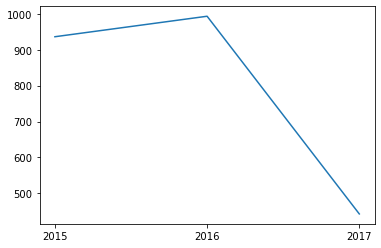

In [28]:
d = {}
for i in df.values:
    year = i[1].replace(".","/").replace("//","/").split("/")[2]
    if year!='':
        d[year] = d.get(year,0) + 1
    else:
        print(i)
year = []
fundings = []
for k in sorted(d.keys()):
    year.append(k)
    print(k,end=' ')
    fundings.append(d[k])
    print(d[k])
print(year)
print(sum(fundings))
plt.plot(year,fundings)
plt.show()

In [25]:
date = "01/08.2017"
date.replace(".","/").split("/")[2]

'2017'

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 78
Chennai 67
Ahmedabad 35
Jaipur 25
Kolkata 19
Chandigarh 10
Vadodara 9
Indore 9
Goa 8
Singapore 5
Kanpur 4
Coimbatore 3
Trivandrum 2
Gwalior 2
Udupi 2
Kochi 2
Agra 2
Siliguri 2
Bhopal 2
Surat 1
Missourie 1
Panaji 1
Karur 1
Hubli 1
Kerala 1
Kozhikode 1
Lucknow 1
London 1
Varanasi 1
Jodhpur 1
Boston 1
Belgaum 1
New York 1
Nagpur 1
Udaipur 1


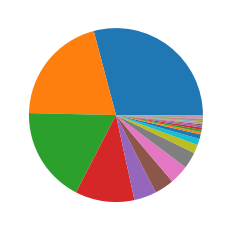

In [51]:
d = {}
city_map = {}
city_map['bangalore'] = 'Bangalore'
city_map['Delhi'] = 'New Delhi'
city_map['Dallas'] = 'Hyderabad'
city_map['SFO'] = 'Bangalore'
city_map['Seattle'] = 'Bangalore'

for i in df[df['CityLocation'].notnull()].values:
    city = i[5].split("/")[0].strip()
#     city = i[5]
    city = city_map.get(city,city)
    if city in ['US','USA','India']:
        continue
    d[city] = d.get(city,0) + 1
city = []
posting = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
for k in d_sorted.keys():
    city.append(k)
    print(k,end=' ')
    posting.append(d_sorted[k])
    print(d_sorted[k])

plt.pie(posting)
plt.show()

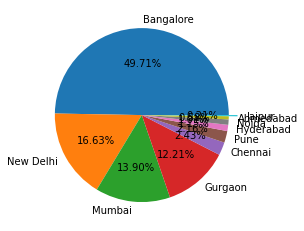

Bangalore  49.71
New Delhi  16.63
Mumbai  13.90
Gurgaon  12.21
Chennai  2.43
Pune  2.16
Hyderabad  1.15
Noida  1.01
Ahmedabad  0.58
Jaipur  0.21


In [82]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import matplotlib.pyplot as plt
import decimal

df = pd.read_csv("startup_funding.csv")

d = {}
city_map = {}
city_map['bangalore'] = 'Bangalore'
city_map['Delhi'] = 'New Delhi'
# city_map['Dallas'] = 'Hyderabad'
# city_map['SFO'] = 'Bangalore'
# city_map['Seattle'] = 'Bangalore'

for i in df[(df['CityLocation'].notnull()) &df['AmountInUSD'].notnull()].values:
    city = i[5].split("/")[0].strip()
#     city = i[5]
    city = city_map.get(city,city)
    if city in ['US','USA']:
        continue
#     print(i[8])
    amt = int(i[8].replace(",",""))
#     print(amt)
    d[city] = d.get(city,0) + amt
city = []
funding = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
count = 0
for k in d_sorted.keys():
    if count==10:
        break
    city.append(k)
#     print(k,end=' ')
    funding.append(d_sorted[k])
#     print(d_sorted[k])
    count+=1

explodes = [0,0,0,0,0,0,0,0,0,0.1]
plt.pie(funding,explode=explodes,labels=city,autopct="%.2f%%")
plt.show()
for i in range(len(city)):
    print(city[i],end='  ')
    print(format(funding[i]/sum(funding) * 100,'.2f'))

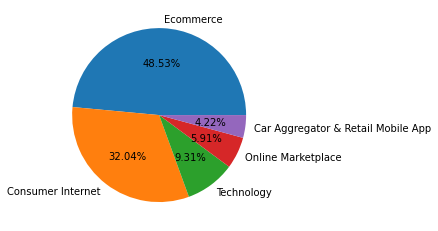

Ecommerce  48.53
Consumer Internet  32.04
Technology  9.31
Online Marketplace  5.91
Car Aggregator & Retail Mobile App  4.22


In [116]:
df = pd.read_csv("startup_funding.csv")

d = {}
i_type_map = {}
i_type_map['eCommerce'] = 'Ecommerce'
i_type_map['Ecommerce Marketplace'] = 'Ecommerce'
i_type_map['ECommerce'] = 'Ecommerce'
i_type_map['E-Commerce & M-Commerce platform'] = 'Ecommerce'

for i in df[(df['AmountInUSD'].notnull()) & (df['IndustryVertical'].notnull())].values:
    i_type = i[3]
    i_type = i_type_map.get(i_type,i_type)
#     if city in ['US','USA']:
#         continue
    amt = int(i[8].replace(",",""))
    if 'ommerce' in i_type:
        i_type= 'Ecommerce'
    d[i_type] = d.get(i_type,0) + amt
i_type = []
funding = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
count = 0
for k in d_sorted.keys():
    if count==5:
        break
    i_type.append(k)
    funding.append(d_sorted[k])
    count+=1

plt.pie(funding,labels=i_type,autopct="%.2f%%")
plt.show()
for i in range(len(i_type)):
    print(i_type[i],end='  ')
    print(format(funding[i]/sum(funding) * 100,'.2f'))

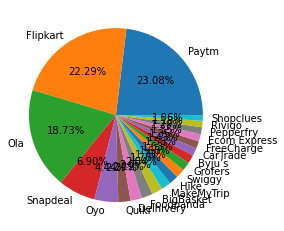

Paytm  23.08
Flipkart  22.29
Ola  18.73
Snapdeal  6.90
Oyo  4.44
Quikr  2.27
Delhivery  2.12
Foodpanda  2.07
BigBasket  2.04
MakeMyTrip  1.78
Hike  1.73
Swiggy  1.68
Grofers  1.63
Byju’s  1.58
CarTrade  1.43
FreeCharge  1.35
Ecom Express  1.35
Pepperfry  1.29
Rivigo  1.18
Shopclues  1.06


In [106]:
df = pd.read_csv("startup_funding.csv")

d = {}
i_type_map = {}
i_type_map['Flipkart.com'] = 'Flipkart'
i_type_map['Ola Cabs'] = 'Ola'
i_type_map['Olacabs'] = 'Ola'
i_type_map['Oyo Rooms'] = 'Oyo'
i_type_map['Paytm Marketplace'] = 'Paytm'

for i in df[(df['AmountInUSD'].notnull()) ].values:
    i_type = i[2]
    i_type = i_type_map.get(i_type,i_type)
#     if city in ['US','USA']:
#         continue
    amt = int(i[8].replace(",",""))
    d[i_type] = d.get(i_type,0) + amt
i_type = []
funding = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
count = 0
for k in d_sorted.keys():
    if count==20:
        break
    i_type.append(k)
    funding.append(d_sorted[k])
    count+=1

plt.pie(funding,labels=i_type,autopct="%.2f%%")
plt.show()
for i in range(len(i_type)):
    print(i_type[i],end='  ')
    print(format(funding[i]/sum(funding) * 100,'.2f'))

In [114]:
if 'commerse' in 'Ecommerse and platform':
    print("yes")
else:
    print("No")

yes


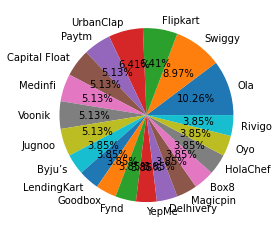

Ola 8
Swiggy 7
Flipkart 5
UrbanClap 5
Paytm 4
Capital Float 4
Medinfi 4
Voonik 4
Jugnoo 4
Byju’s 3
LendingKart 3
Goodbox 3
Fynd 3
YepMe 3
Delhivery 3
Magicpin 3
Box8 3
HolaChef 3
Oyo 3
Rivigo 3


In [117]:
d = {}
i_type_map = {}
i_type_map['Flipkart.com'] = 'Flipkart'
i_type_map['Ola Cabs'] = 'Ola'
i_type_map['Olacabs'] = 'Ola'
i_type_map['Oyo Rooms'] = 'Oyo'
i_type_map['Paytm Marketplace'] = 'Paytm'

for i in df[df['AmountInUSD'].notnull()].values:
    i_type = i[2]
    i_type = i_type_map.get(i_type,i_type)
#     if city in ['US','USA']:
#         continue
    # amt = int(i[8].replace(",",""))
    d[i_type] = d.get(i_type,0) + 1
i_type = []
funding = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
count = 0
for k in d_sorted.keys():
    if count==20:
        break
    i_type.append(k)
    funding.append(d_sorted[k])
    count+=1

plt.pie(funding,labels=i_type,autopct="%.2f%%")
plt.show()
for i in range(len(i_type)):
    print(i_type[i],end=' ')
    print(funding[i])

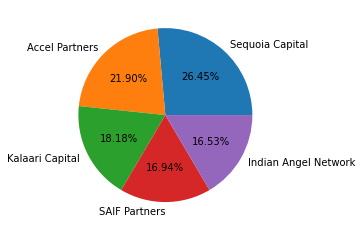

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [123]:
d = {}
i_type_map = {}
i_type_map['Flipkart.com'] = 'Flipkart'
i_type_map['Ola Cabs'] = 'Ola'
i_type_map['Olacabs'] = 'Ola'
i_type_map['Oyo Rooms'] = 'Oyo'
i_type_map['Paytm Marketplace'] = 'Paytm'

for i in df[df['InvestorsName'].notnull()].values:
    i_type = i[6].split(",")
    if 'undisclosed' in i_type or 'Undisclosed' in i_type:
        continue
    for j in i_type:
        d[j.strip()] = d.get(j.strip(),0) + 1
i_type = []
funding = []
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
count = 0
for k in d_sorted.keys():
    if count==5:
        break
    i_type.append(k)
    funding.append(d_sorted[k])
    count+=1

plt.pie(funding,labels=i_type,autopct="%.2f%%")
plt.show()
for i in range(len(i_type)):
    print(i_type[i],end=' ')
    print(funding[i])